<a href="https://colab.research.google.com/github/Jwelliver/data-puzzles/blob/main/data-puzzles-com/Speed_limit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

The dataset loaded below represents a random sample of cars speed on certain roads.

Can you figure out what the speed limit is for each road?
Write back the sum of all roads speeds limits back on the data-puzzles webpage!

# Kickstart

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker

speeds_df = pd.read_csv('https://raw.githubusercontent.com/hyperc54/data-puzzles-assets/master/visualisation/speeds_data.csv')

In [ ]:
speeds_df.head()

,plate,road,speed
0,DN9166SU,R87,49.7
1,CG4862ZS,R87,49.4
2,DV4956AM,R87,49.9
3,TL4125OA,R87,51.3
4,LX3827BI,R87,48.1


[21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38.
 39. 40. 41. 42.]


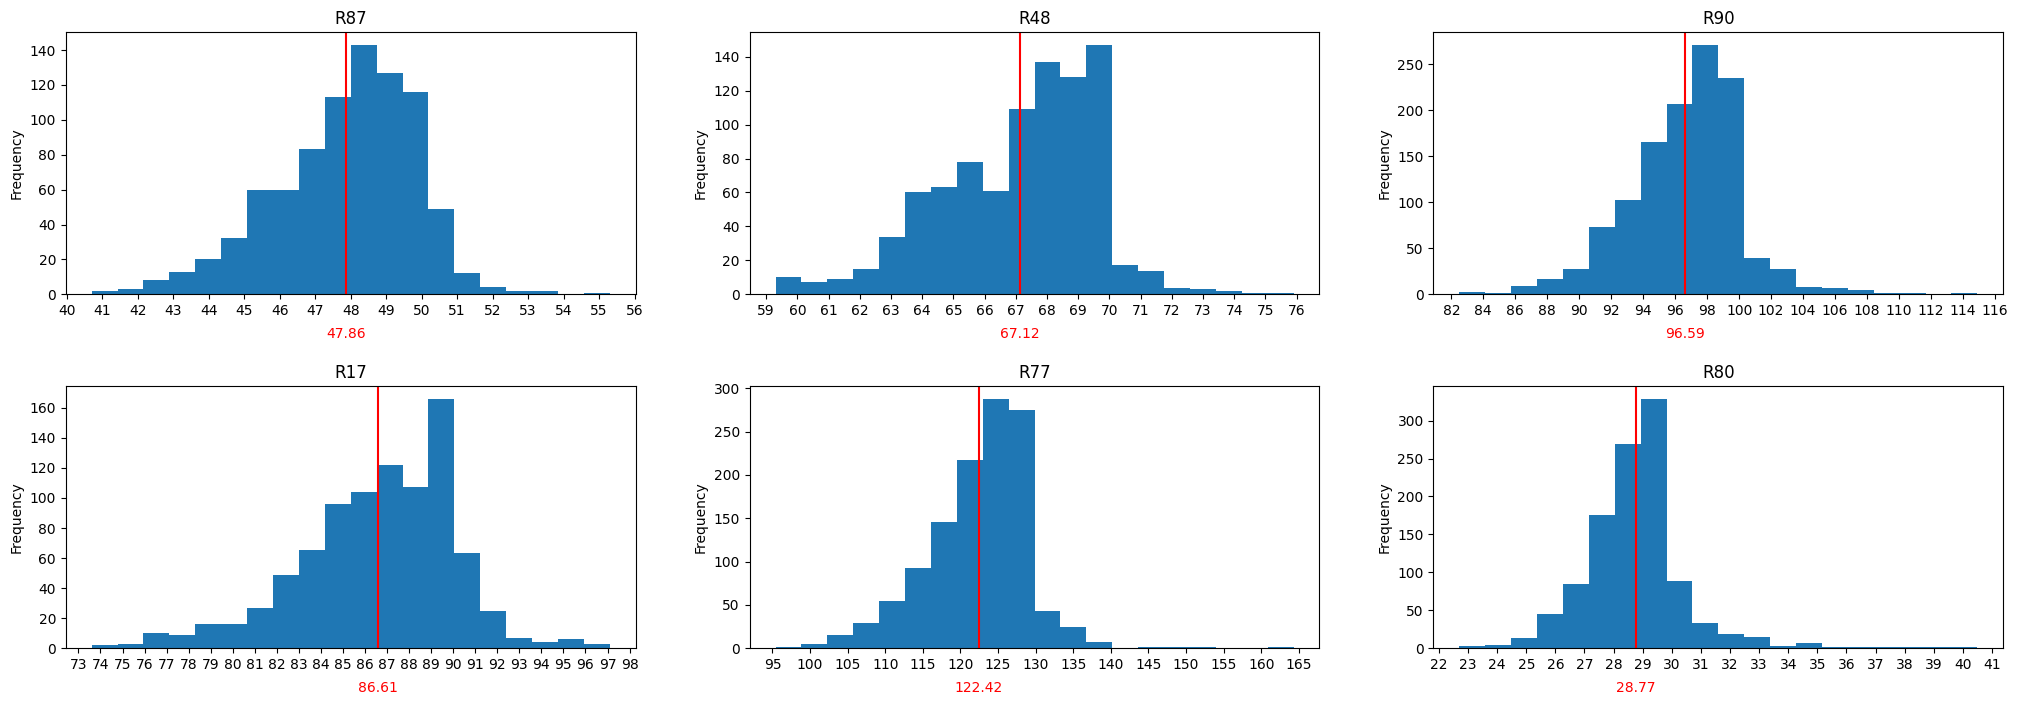

In [ ]:
# Your turn now! figure out the speed limit per road and add them up!

speeds_df.describe()

roads = speeds_df['road'].unique()

avg_speeds = speeds_df.groupby('road')['speed'].mean()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,8), )
axes = axes.flatten()

for i in range(len(roads)):
  road_data = speeds_df.loc[speeds_df['road']==roads[i]]
  road_data.plot(kind='hist', ax=axes[i], title=roads[i], legend=None, bins=20)
  speed_mean = road_data['speed'].mean()
  axes[i].axvline(x=speed_mean, color='r', label=f'Avg: {speed_mean}')
  axes[i].text(speed_mean, -.125, f'{speed_mean:.2f}', color='red', transform=axes[i].get_xaxis_transform(),
            ha='center', va='top')
  xtick_interval = 5 if (roads[i]=='R77' ) else 2 if roads[i]=='R90' else 1
  axes[i].xaxis.set_major_locator(ticker.MultipleLocator(xtick_interval))

print(plt.xticks()[0])

plt.subplots_adjust(hspace=0.35)
plt.show()





In [ ]:
speed_limits = {
    'R87': 50,
    'R48': 70,
    'R90': 100,
    'R17': 90,
    'R77': 130,
    'R80': 30
}
print(sum(speed_limits.values()))

470


In [21]:
# Can you recover the plate of the car going the fastest above their speed limit? (in %)

speeds_df['pct_of_speed_limit'] = speeds_df.apply(lambda row: row['speed']/speed_limits[row['road']], axis=1 )

print(speeds_df.sort_values(by='pct_of_speed_limit', ascending=False).iloc[0])

plate                 RQ3458CQ
road                       R80
speed                     40.5
pct_of_speed_limit        1.35
Name: 5460, dtype: object
